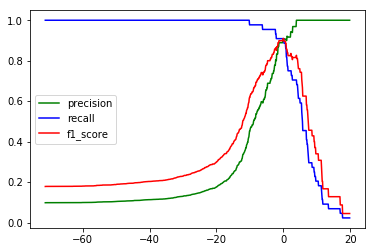

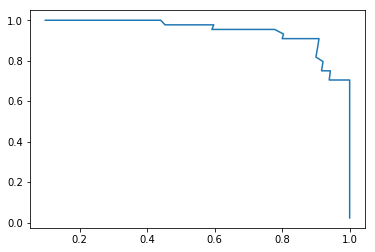

In [17]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

digits = datasets.load_digits()
X = digits.data
y = digits.target.copy()

y[digits.target==9] = 1
y[digits.target!=9] = 0

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=6670)

from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

decision_scores = log_reg.decision_function(X_test)
thresholds = np.arange(np.min(decision_scores),np.max(decision_scores),0.1)
precisions = []
recalls = []
f1s = []
for threshold in thresholds:
    y_log_predict_2 = np.array(decision_scores >= threshold,dtype ='int')
    precisions.append(precision_score(y_test, y_log_predict_2))
    recalls.append(recall_score(y_test, y_log_predict_2))
    f1s.append(f1_score(y_test,y_log_predict_2))

plt.plot(thresholds,precisions,color='g',label='precision')
plt.plot(thresholds,recalls,color='b',label='recall')
plt.plot(thresholds,f1s,color='r',label='f1_score')
plt.legend()
plt.show()

plt.plot(precisions,recalls)
plt.show()

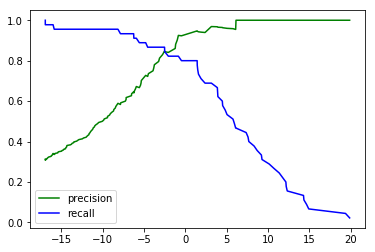

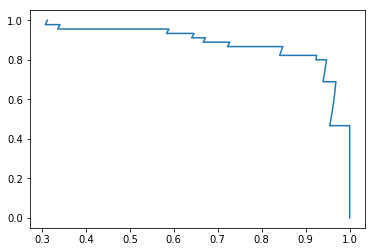

In [14]:
from sklearn.metrics import precision_recall_curve
precisions,recalls,thresholds = precision_recall_curve(y_test,decision_scores)#返回，precisions,recalls,thresholds,自动定义步长，
                                                                             #thresholds的shape少1，最大的threshold默认分类为1，最小的为0
plt.plot(thresholds,precisions[:-1],color='g',label='precision')
plt.plot(thresholds,recalls[:-1],color='b',label='recall')
plt.legend()
plt.show()

plt.plot(precisions,recalls)
plt.show()